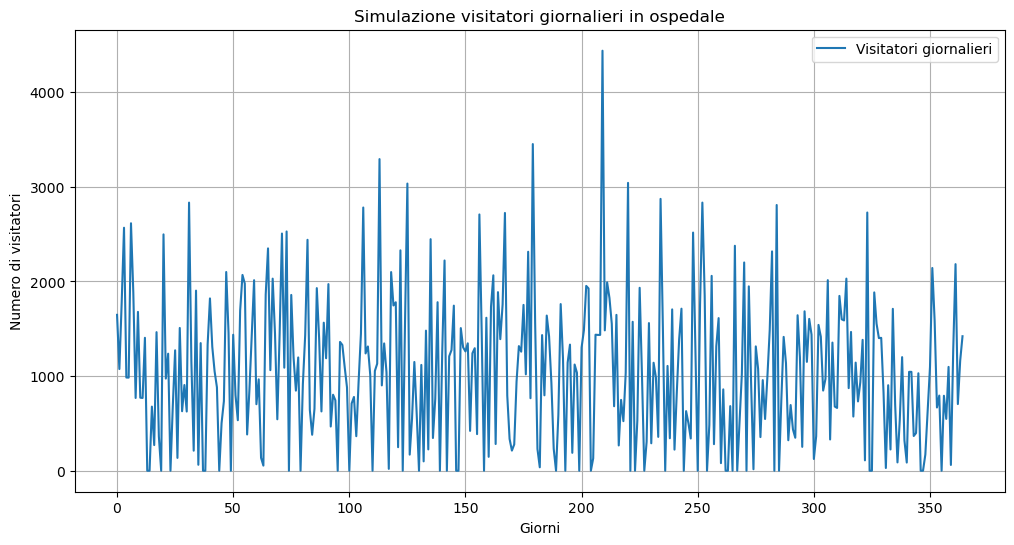

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
n_giorni = 365
media = 1200
dev_std = 900

# Genera la serie di visitatori con rumore casuale
np.random.seed(42)  # Per riproducibilità
visitatori = np.random.normal(loc=media, scale=dev_std, size=n_giorni)

# Aggiungi un trend decrescente (es. diminuzione lineare)
trend_decrescente = np.linspace(0, -400, n_giorni)
visitatori_con_trend = visitatori + trend_decrescente

# Assicura che il numero di visitatori non sia negativo
visitatori_con_trend = np.clip(visitatori_con_trend, 0, None)

# Visualizza il risultato
plt.figure(figsize=(12, 6))
plt.plot(visitatori_con_trend, label="Visitatori giornalieri")
plt.title("Simulazione visitatori giornalieri in ospedale")
plt.xlabel("Giorni")
plt.ylabel("Numero di visitatori")
plt.legend()
plt.grid(True)
plt.show()
